# Fruit Image Classification using VGG19 and Fine Tuning
This notebook is written and executed by **Dr Raheel Siddiqi** on 27-05-2019. The notebook presents an experiment to classify fruit images using *fine tuning*. *Fruits 360 dataset* (containing 52262 training images and 17540 test images belonging to 101 fruit classes) has been exploited for the task. 
The model designed uses **VGG19** pre-trained model as the convolutional base. The steps for fine-tuning a network are as follows:
1. Add the custom network on top of an already-trained base network.
2. Freeze the base network.
3. Train the part that has been added.
4. Unfreeze some layers in the base network.
5. Jointly train both these layers and the part that has been added.

First I execute the first three steps which are the same as *transfer learning*.

## Tensorflow and Keras version used

In [1]:
import tensorflow as tf
from tensorflow.python import keras

print('Tensorflow Version: ', tf.__version__)
print('Keras Version: ', keras.__version__)

Tensorflow Version:  1.13.1
Keras Version:  2.2.4-tf


## Adding Classifier on top of the pre-trained VGG16 Convolutional Base and freezing the Convolutional Base

In [2]:
from tensorflow.python.keras.applications import VGG19

conv_base=VGG19(weights='imagenet',include_top=False,input_shape=(100,100,3))

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [4]:
import os
import numpy as np
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.callbacks import ModelCheckpoint

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(101, activation='softmax'))
filepath="VGG19_fruit_image_classification_best_model_101_classes.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2359808   
_________________________________________________________________
dense_1 (Dense)              (None, 101)               51813     
Total params: 22,436,005
Trainable params: 22,436,005
Non-trainable params: 0
_________________________________________________________________


## Setting up Training and Validation Data for the experiment

In [6]:
train_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Training'

In [7]:
validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Test'

In [8]:
batch_size=32
number_of_training_samples=52262
number_of_test_samples=17540

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 52262 images belonging to 101 classes.
Found 17540 images belonging to 101 classes.


## Model Training

In [10]:
from tensorflow.python.keras import optimizers

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])

In [11]:
import math

history = model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=30,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_test_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
1634/1634 [==============================] - 1050s 643ms/step - loss: 3.1954 - categorical_accuracy: 0.2075 - val_loss: 1.2361 - val_categorical_accuracy: 0.6032
Epoch 2/30
1634/1634 [==============================] - 648s 396ms/step - loss: 0.6599 - categorical_accuracy: 0.7818 - val_loss: 0.3125 - val_categorical_accuracy: 0.8895
Epoch 3/30
1634/1634 [==============================] - 638s 391ms/step - loss: 0.2639 - categorical_accuracy: 0.9122 - val_loss: 0.1570 - val_categorical_accuracy: 0.9419
Epoch 4/30
1634/1634 [==============================] - 639s 391ms/step - loss: 0.1728 - categorical_accuracy: 0.9443 - val_loss: 0.1163 - val_categorical_accuracy: 0.9638
Epoch 5/30
1634/1634 [==============================] - 641s 392ms/step - loss: 0.1249 - categorical_accuracy: 0.9582 - val_loss: 0.1192 - val_categorical_accuracy: 0.9593
Epoch 6/30
1634/1634 [==============================] - 645s 395ms/step - loss: 0.1126 - ca

## Visualizing the Training Process

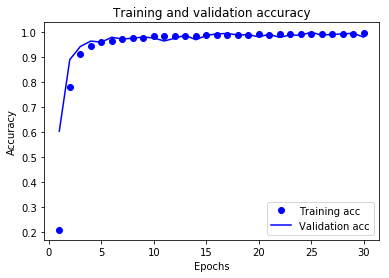

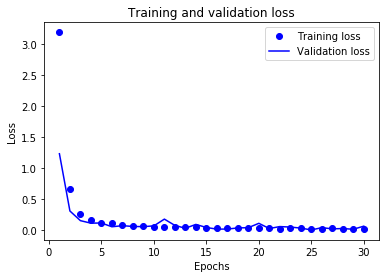

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('fruit_image_classification_101_classes_fine tuning_vgg19_data augmentation_1a',format='png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('fruit_image_classification_101_classes_fine tuning_vgg19_data augmentation_1b',format='png')
plt.show()

## Loading the Best Model

In [13]:
from tensorflow.python.keras.models import load_model

best_model = load_model('VGG19_fruit_image_classification_best_model_101_classes.h5')

## Evaluating the Best Model

In [14]:
steps_test=int(17540/32)
result = best_model.evaluate_generator(validation_generator, steps=steps_test,verbose=1)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

549/549 [==============================] - 60s 109ms/step - loss: 0.0074 - categorical_accuracy: 0.9991
Test-set classification accuracy: 99.91%


## Unfreeze Some Layers in the Convolutional Base
The first 3 steps of fine-tuning a network (mentioned above) have been completed. Now, I will unfreeze the `conv_base` and then freeze/unfreeze individual layers inside it. I will fine-tune the last three convolutional layers, which means all layers up to `block4_pool` should be frozen, and the layers `block5_conv1`, `block5_conv2`, and `block5_conv3` should be trainable.

In [15]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

## Jointly train both the Unfrozen Layers and the added Classifier

In [16]:
filepath="VGG19_fine_tuning_fruit_image_classification_best_model_101_classes.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

In [17]:
best_model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-5),metrics=['categorical_accuracy'])

In [19]:
import math

history = best_model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=30,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_test_samples//batch_size))

Epoch 1/30
1634/1634 [==============================] - 976s 597ms/step - loss: 0.0016 - categorical_accuracy: 0.9994 - val_loss: 0.0059 - val_categorical_accuracy: 0.9990
Epoch 2/30
1634/1634 [==============================] - 581s 356ms/step - loss: 8.7340e-04 - categorical_accuracy: 0.9997 - val_loss: 0.0068 - val_categorical_accuracy: 0.9984
Epoch 3/30
1634/1634 [==============================] - 586s 359ms/step - loss: 4.8706e-04 - categorical_accuracy: 0.9999 - val_loss: 0.0080 - val_categorical_accuracy: 0.9981
Epoch 4/30
1634/1634 [==============================] - 571s 350ms/step - loss: 9.3756e-04 - categorical_accuracy: 0.9998 - val_loss: 0.0055 - val_categorical_accuracy: 0.9992
Epoch 5/30
1634/1634 [==============================] - 571s 349ms/step - loss: 5.7850e-04 - categorical_accuracy: 0.9998 - val_loss: 0.0186 - val_categorical_accuracy: 0.9940
Epoch 6/30
1634/1634 [==============================] - 570s 349ms/step - loss: 5.4182e-04 - categorical_accuracy: 0.9999 - 

1634/1634 [==============================] - 570s 349ms/step - loss: 5.7061e-04 - categorical_accuracy: 0.9999 - val_loss: 0.0061 - val_categorical_accuracy: 0.9987


## Loading the Best Model after Fine Tuning

In [20]:
best_model_fine_tuned = load_model('VGG19_fine_tuning_fruit_image_classification_best_model_101_classes.h5')

## Evaluating the Best Model after Fine Tuning

In [21]:
steps_test=int(17540/32)
result = best_model_fine_tuned.evaluate_generator(validation_generator, steps=steps_test,verbose=1)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

549/549 [==============================] - 55s 100ms/step - loss: 0.0042 - categorical_accuracy: 0.9997s - loss: 0.0042 - categorical_accu
Test-set classification accuracy: 99.97%
